In [0]:
# Add imports, read in data to analyze
import json
import matplotlib.pyplot as plt
from pyspark.sql.functions import sum, desc, isnull, col, avg, count, when, from_json
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

spark.conf.set(
    "fs.azure.account.key.assignment1store.dfs.core.windows.net",
    dbutils.secrets.get(scope="DatabricksSetupScope", key="MySecret"))

uri = "abfss://assignment1@assignment1store.dfs.core.windows.net/"

# Fitbit
fitbit_daily_activity_df = spark.read.csv(uri + 'data/f23-proj/FitbitDailyActivity.csv', header=True)
fitbit_sleep_log_df = spark.read.json(uri + 'data/f23-proj/FitbitSleepLog.json')
fitbit_user_profile_df = spark.read.csv(uri + 'data/f23-proj/FitbitUserProfile.csv', header=True)

# Hevy
hevy_workouts_df = spark.read.csv(uri + 'data/f23-proj/HevyWorkouts.csv', header=True)

# Polar
polar_exercises_df = spark.read.csv(uri + 'data/f23-proj/PolarExercises.csv', header=True)

# Kaggle datasets (static)
crossfit_athletes_df = spark.read.csv(uri + 'data/f23-proj/CrossfitAthletes.csv', header=True)
nfl_combine_results_df = spark.read.csv(uri + 'data/f23-proj/NFLCombineResults.csv', header=True)

# World Masters Athletics (static)
world_athletics_df = spark.read.csv(uri + 'data/f23-proj/mens_100m_race_results_2022_30_34.csv', header=True)

# Display Fitbit Data
Sleep log is most important file. This is the most valuable data (at the end of the JSON file response). 

```
logId": 43358421833,
  "logType": "auto_detected",
  "minutesAfterWakeup": 1,
  "minutesAsleep": 481,
  "minutesAwake": 59,
  "minutesToFallAsleep": 0,
  "startTime": "2023-11-03T22:39:00.000",
  "timeInBed": 540,
  "type": "stages`
```

In [0]:
display(fitbit_sleep_log_df)

0
"List(2023-11-04, 32400000, 98, 2023-11-04T07:39:30.000, 0, true, List(List(List(2023-11-03T22:39:00.000, wake, 420), List(2023-11-03T22:46:00.000, light, 330), List(2023-11-03T22:51:30.000, deep, 2400), List(2023-11-03T23:31:30.000, light, 2250), List(2023-11-04T00:09:00.000, rem, 1170), List(2023-11-04T00:28:30.000, light, 4230), List(2023-11-04T01:39:00.000, deep, 1050), List(2023-11-04T01:56:30.000, light, 60), List(2023-11-04T01:57:30.000, rem, 2220), List(2023-11-04T02:34:30.000, light, 3180), List(2023-11-04T03:27:30.000, wake, 240), List(2023-11-04T03:31:30.000, light, 300), List(2023-11-04T03:36:30.000, rem, 330), List(2023-11-04T03:42:00.000, light, 450), List(2023-11-04T03:49:30.000, wake, 270), List(2023-11-04T03:54:00.000, light, 600), List(2023-11-04T04:04:00.000, wake, 300), List(2023-11-04T04:09:00.000, light, 3420), List(2023-11-04T05:06:00.000, deep, 450), List(2023-11-04T05:13:30.000, light, 630), List(2023-11-04T05:24:00.000, wake, 270), List(2023-11-04T05:28:30.000, rem, 330), List(2023-11-04T05:34:00.000, light, 780), List(2023-11-04T05:47:00.000, rem, 420), List(2023-11-04T05:54:00.000, light, 750), List(2023-11-04T06:06:30.000, deep, 2460), List(2023-11-04T06:47:30.000, light, 240), List(2023-11-04T06:51:30.000, rem, 1560), List(2023-11-04T07:17:30.000, light, 990), List(2023-11-04T07:34:00.000, wake, 330)), List(List(2023-11-03T23:29:00.000, wake, 150), List(2023-11-03T23:34:30.000, wake, 60), List(2023-11-03T23:38:00.000, wake, 60), List(2023-11-04T00:01:00.000, wake, 30), List(2023-11-04T00:04:00.000, wake, 60), List(2023-11-04T00:08:30.000, wake, 30), List(2023-11-04T00:13:30.000, wake, 30), List(2023-11-04T00:22:00.000, wake, 30), List(2023-11-04T00:37:00.000, wake, 180), List(2023-11-04T01:27:30.000, wake, 30), List(2023-11-04T02:27:30.000, wake, 30), List(2023-11-04T02:42:00.000, wake, 30), List(2023-11-04T03:03:00.000, wake, 120), List(2023-11-04T03:45:00.000, wake, 30), List(2023-11-04T04:12:00.000, wake, 30), List(2023-11-04T05:14:30.000, wake, 60), List(2023-11-04T05:33:00.000, wake, 60), List(2023-11-04T05:37:00.000, wake, 120), List(2023-11-04T05:41:30.000, wake, 30), List(2023-11-04T05:45:30.000, wake, 90), List(2023-11-04T06:46:30.000, wake, 60), List(2023-11-04T06:51:30.000, wake, 150), List(2023-11-04T06:59:00.000, wake, 30), List(2023-11-04T07:15:00.000, wake, 150), List(2023-11-04T07:20:00.000, wake, 60), List(2023-11-04T07:22:30.000, wake, 30)), List(List(4, 103, 69), List(29, 286, 236), List(10, 92, 73), List(32, 59, 63))), 43358421833, auto_detected, 1, 481, 59, 0, 2023-11-03T22:39:00.000, 540, stages)"


Example Question:
- What % of the time was I sleeping vs % of the time I was awake (for a given day, range of days, month, etc.)

Calculate sleeping efficiency using **minutesAwake vs. minutesAsleep**

In [0]:
first_row = fitbit_sleep_log_df.collect()[0]

minutes_awake = first_row[0]['minutesAwake']
minutes_asleep = first_row[0]['minutesAsleep']

total_time = minutes_asleep + minutes_awake
percent_asleep = (minutes_asleep / total_time) * 100
percent_awake = (minutes_awake / total_time) * 100

print("Percent Asleep: {:.2f}%".format(percent_asleep))
print("Percent Awake: {:.2f}%".format(percent_awake))

Percent Asleep: 89.07%
Percent Awake: 10.93%


Plot it, show a simple stacked bar chart

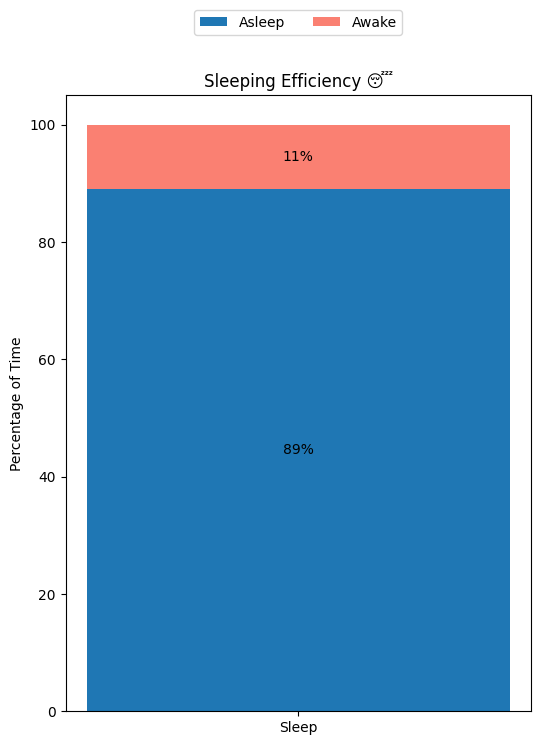

In [0]:
# Initialize the plot
plt.figure(figsize=(6, 8))
plt.title('Sleeping Efficiency \U0001F634')
plt.ylabel('Percentage of Time')

# Plot the bars
bar1 = plt.bar(['Sleep'], [percent_asleep], color='tab:blue', label='Asleep')
bar2 = plt.bar(['Sleep'], [percent_awake], bottom=[percent_asleep], color='salmon', label='Awake')

# Get height of the bars
height1 = bar1[0].get_height()
height2 = bar2[0].get_height()

# Add labels on top of the bars with center alignment
plt.text(x=0, y=height1/2, s='{:.0f}%'.format(percent_asleep), ha='center', va='center')
plt.text(x=0, y=height1+height2/2, s='{:.0f}%'.format(percent_awake), ha='center', va='center')

# Show the chart
plt.legend(loc='upper center', bbox_to_anchor=[0.5, 1.15], ncol=2)
plt.show()

In [0]:
display(fitbit_daily_activity_df)

activeZoneMinutes,activityLevels,calories,customHeartRateZones,distance,elevation,floors,heartRateZones,steps
6,"[{'distance': 0, 'minutes': 611, 'name': 'sedentary'}, {'distance': 0.95, 'minutes': 61, 'name': 'lightly'}, {'distance': 0, 'minutes': 0, 'name': 'moderately'}, {'distance': 0, 'minutes': 0, 'name': 'very'}]","{'bmr': 1369, 'total': 1606}",[],0.95,0,0,"[{'caloriesOut': 1556.4872699999999, 'max': 105, 'min': 30, 'minutes': 1434, 'name': 'Out of Range'}, {'caloriesOut': 49.82562, 'max': 132, 'min': 105, 'minutes': 6, 'name': 'Fat Burn'}, {'caloriesOut': 0, 'max': 165, 'min': 132, 'minutes': 0, 'name': 'Cardio'}, {'caloriesOut': 0, 'max': 220, 'min': 165, 'minutes': 0, 'name': 'Peak'}]",1276


In [0]:
display(fitbit_user_profile_df)

age,ambassador,autoStrideEnabled,avatar,avatar150,avatar640,averageDailySteps,challengesBeta,clockTimeDisplayFormat,corporate,corporateAdmin,dateOfBirth,displayName,displayNameSetting,distanceUnit,encodedId,features,firstName,foodsLocale,fullName,gender,glucoseUnit,height,heightUnit,isBugReportEnabled,isChild,isCoach,languageLocale,lastName,legalTermsAcceptRequired,locale,memberSince,mfaEnabled,offsetFromUTCMillis,phoneNumber,sdkDeveloper,sleepTracking,startDayOfWeek,strideLengthRunning,strideLengthRunningType,strideLengthWalking,strideLengthWalkingType,swimUnit,temperatureUnit,timezone,topBadges,visibleUser,waterUnit,waterUnitName,weight,weightUnit
34,False,True,https://static0.fitbit.com/images/profile/defaultProfile_100.png,https://static0.fitbit.com/images/profile/defaultProfile_150.png,https://static0.fitbit.com/images/profile/defaultProfile_640.png,4543,True,24hour,False,False,1989-09-16,Health F.,name,en_US,9M4W75,{'exerciseGoal': True},Health,en_US,Health Fitness,MALE,en_US,180.3,en_US,False,False,False,en_US,Fitness,False,en_US,2021-09-26,True,-21600000,+17014918492,False,Normal,SUNDAY,110.4,auto,74.8,auto,en_US,en_US,America/Chicago,"""[{'badgeGradientEndColor': 'FFDB01', 'badgeGradientStartColor': 'D99123', 'badgeType': 'DAILY_STEPS', 'category': 'Daily Steps', 'cheers': [], 'dateTime': '2023-10-15', 'description': '25,000 steps in a day', 'earnedMessage': 'Congrats on earning your first Classics badge!', 'encodedId': '228TLX', 'image100px': 'https://www.gstatic.com/fitbit/badge/images/badges_new/100px/badge_daily_steps25k.png', 'image125px': 'https://www.gstatic.com/fitbit/badge/images/badges_new/125px/badge_daily_steps25k.png', 'image300px': 'https://www.gstatic.com/fitbit/badge/images/badges_new/300px/badge_daily_steps25k.png', 'image50px': 'https://www.gstatic.com/fitbit/badge/images/badges_new/badge_daily_steps25k.png', 'image75px': 'https://www.gstatic.com/fitbit/badge/images/badges_new/75px/badge_daily_steps25k.png', 'marketingDescription': """"You've walked 25","000 steps And earned the Classics badge!""""","'mobileDescription': """"With this impressive fitness feat",you've added a badge to your growing collection. Nice job,"you stepping all-star!""""",'name': 'Classics (25


# Display Hevy data
One row = one workout

2 most important metrics:
- duration (how long training session)
- estimated_volume_kg (how much total weight lifted)

In [0]:
display(hevy_workouts_df.limit(20))

id short_id index name description start_time end_time created_at updated_at routine_id apple_watch user_id username profile_image verified nth_workout like_count is_liked_by_user is_private like_images comments comment_count media image_urls exercises estimated_volume_kg c02ee31b-e638-4baf-b6a2-262910dff221 MdLpC7ruF1Z 30426659 COD & Lower Focus RPE 4, isos hardest 1698717635 1698719486 2023-10-31T02:31:14.152Z 2023-10-31T02:32:24.874Z f58c7b50-d6b9-4d7c-9baf-d5b566eec9df True c36b0a00-49d2-414a-9c70-e549f9cf3b46 healthfitnessgains null False 1 0 False True [] [{'id': 1214979, 'username': 'healthfitnessgains', 'verified': False, 'comment': 'RPE 4', 'created_at': '2023-10-31T02:32:04.244Z'}] 1 [{'type': 'image', 'url': 'https://d2l9nsnmtah87f.cloudfront.net/profile-images/healthfitnessgains-85ac1649-0b13-4981-9216-29b7ebc892db.jpg'}] ['https://d2l9nsnmtah87f.cloudfront.net/profile-images/healthfitnessgains-85ac1649-0b13-4981-9216-29b7ebc892db.jpg'] [{'id': '0f094543-9c86-487a-9fd5-979f0199570a', 'title': 'SL Overcoming ISO Drives (Fwd/Bkwd/Lat)', 'es_title': None, 'de_title': None, 'fr_title': None, 'it_title': None, 'pt_title': None, 'ko_title': None, 'ja_title': None, 'tr_title': None, 'ru_title': None, 'zh_cn_title': None, 'zh_tw_title': None, 'superset_id': None, 'rest_seconds': 30, 'notes': '', 'exercise_template_id': '5d5c8884-3ef4-4a5f-a59a-652bb6bc9a26', 'exercise_type': 'duration', 'equipment_category': 'barbell', 'custom_exercise_image_url': None, 'custom_exercise_image_thumbnail_url': None, 'thumbnail_url': None, 'muscle_group': 'glutes', 'other_muscles': ['calves', 'hamstrings', 'quadriceps'], 'priority': 10, 'sets': [{'id': '691510856', 'index': 0, 'indicator': 'normal', 'weight_kg': None, 'reps': None, 'distance_meters': None, 'duration_seconds': 5, 'rpe': None, 'prs': [], 'personalRecords': []}, {'id': '691510857', 'index': 1, 'indicator': 'normal', 'weight_kg': None, 'reps': None, 'distance_meters': None, 'duration_seconds': 5, 'rpe': None, 'prs': [], 'personalRecords': []}, {'id': '691510858', 'index': 2, 'indicator': 'normal', 'weight_kg': None, 'reps': None, 'distance_meters': None, 'duration_seconds': 5, 'rpe': None, 'prs': [], 'personalRecords': []}, {'id': '691510859', 'index': 3, 'indicator': 'normal', 'weight_kg': None, 'reps': None, 'distance_meters': None, 'duration_seconds': 5, 'rpe': None, 'prs': [], 'personalRecords': []}, {'id': '691510860', 'index': 4, 'indicator': 'normal', 'weight_kg': None, 'reps': None, 'distance_meters': None, 'duration_seconds': 5, 'rpe': None, 'prs': [], 'personalRecords': []}, {'id': '691510861', 'index': 5, 'indicator': 'normal', 'weight_kg': None, 'reps': None, 'distance_meters': None, 'duration_seconds': 8, 'rpe': None, 'prs': [], 'personalRecords': []}]}, {'id': 'f0460336-330c-4033-afa4-a92422868aa5', 'title': 'Single Leg Lateral Bounds + Stick (Reactive)', 'es_title': None, 'de_title': None, 'fr_title': None, 'it_title': None, 'pt_title': None, 'ko_title': None, 'ja_title': None, 'tr_title': None, 'ru_title': None, 'zh_cn_title': None, 'zh_tw_title': None, 'superset_id': None, 'rest_seconds': 30, 'notes': '', 'exercise_template_id': 'dca4bc00-3f27-452a-a46b-c052ebfcc14b', 'exercise_type': 'reps_only', 'equipment_category': 'none', 'custom_exercise_image_url': None, 'custom_exercise_image_thumbnail_url': None, 'thumbnail_url': None, 'muscle_group': 'glutes', 'other_muscles': ['quadriceps', 'calves'], 'priority': 10, 'sets': [{'id': '691510862', 'index': 0, 'indicator': 'normal', 'weight_kg': None, 'reps': 5, 'distance_meters': None, 'duration_seconds': None, 'rpe': None, 'prs': [], 'personalRecords': []}, {'id': '691510863', 'index': 1, 'indicator': 'normal', 'weight_kg': None, 'reps': 5, 'distance_meters': None, 'duration_seconds': None, 'rpe': None, 'prs': [], 'personalRecords': []}, {'id': '691510864', 'index': 2, 'indicator': 'normal', 'weight_kg': None, 'reps': 5, 'distance_meters': None, 'duration_seconds': None, 'rpe': None, 'prs': [], 'personalRecords': []}]},

Show volume lifted. Compare workouts

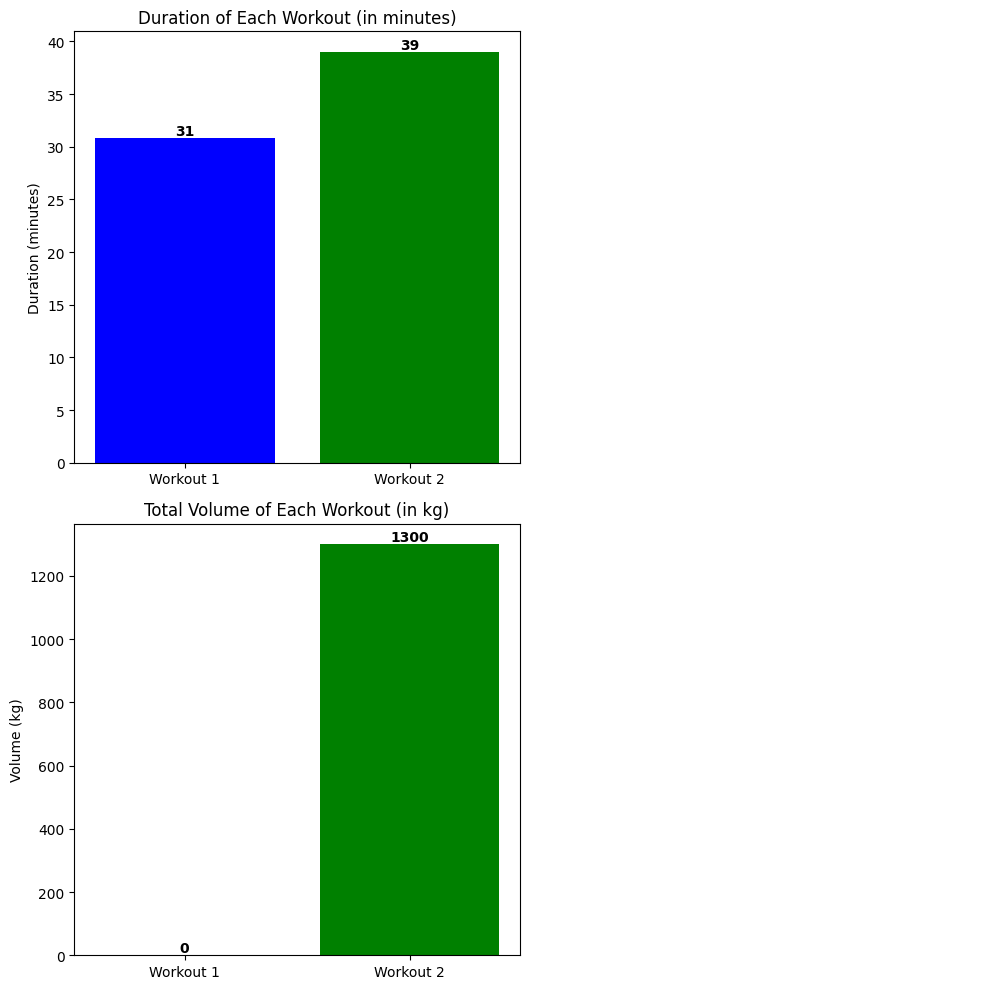

In [0]:
workout_rows = hevy_workouts_df.take(2)

# Convert start and end times from strings to integers and calculate duration in minutes
workout1_duration_minutes = (int(workout_rows[0]['end_time']) - int(workout_rows[0]['start_time'])) / 60
workout2_duration_minutes = (int(workout_rows[1]['end_time']) - int(workout_rows[1]['start_time'])) / 60

workout1_volume = float(workout_rows[0]['estimated_volume_kg'])
workout2_volume = float(workout_rows[1]['estimated_volume_kg'])

# display these values in a 2x2 grid using matplotlib
workouts = ['Workout 1', 'Workout 2']
durations = [workout1_duration_minutes, workout2_duration_minutes]
volumes = [workout1_volume, workout2_volume]  # Make sure these are numeric
x = range(len(workouts))  # x-coordinates for the bars

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Ensure we only provide two colors for the two bars
colors = ['blue', 'green']

# Plotting Duration of Each Workout
axs[0, 0].bar(x, durations, color=colors)
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(workouts)
axs[0, 0].set_title('Duration of Each Workout (in minutes)')
axs[0, 0].set_ylabel('Duration (minutes)')

# Plotting Total Volume for Each Workout
axs[1, 0].bar(x, volumes, color=colors)
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(workouts)
axs[1, 0].set_title('Total Volume of Each Workout (in kg)')
axs[1, 0].set_ylabel('Volume (kg)')

# Setting the other plots as empty/blank
axs[0, 1].axis('off')
axs[1, 1].axis('off')

# Add labels on top of the bars with center alignment
for i, v in enumerate(durations):
    axs[0, 0].text(i, v, f'{round(v)}', ha='center', va='bottom', fontweight='bold')
for i, v in enumerate(volumes):
    # Make sure to add a small offset to 'v' to position the label above the bar
    axs[1, 0].text(i, v, f'{round(v)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Display Polar data

one row = one exercise session (walking, cycling, running, etc.)

Note: Polar has two apps (Polar Flow and Polar BEAT). As far as I can tell from experimenting, functionally they do the same thing and provide the same data

In [0]:
display(polar_exercises_df.limit(20))

id,upload_time,polar_user,device,start_time,start_time_utc_offset,duration,heart_rate,sport,has_route,detailed_sport_info,training_load_pro,distance,calories
yMkdO6Yx,2023-10-24T08:22:26Z,https://www.polaraccesslink.com/v3/users/60755152,Polar Flow app,2023-10-24T03:22:05,-300,PT10.516S,{},OTHER,False,YOGA,"{'cardio-load': 0.0, 'cardio-load-interpretation': 'NOT_AVAILABLE', 'muscle-load': -1.0, 'muscle-load-interpretation': 'NOT_AVAILABLE', 'perceived-load': 0.0, 'perceived-load-interpretation': 'NOT_AVAILABLE', 'user-rpe': 'UNKNOWN'}",null,null
0rpz4o8o,2023-10-24T08:26:38Z,https://www.polaraccesslink.com/v3/users/60755152,Polar Flow app,2023-10-24T03:26:18,-300,PT12.801S,{},OTHER,True,PARASPORTS_WHEELCHAIR,"{'cardio-load': 0.0, 'cardio-load-interpretation': 'NOT_AVAILABLE', 'muscle-load': -1.0, 'muscle-load-interpretation': 'NOT_AVAILABLE', 'perceived-load': 0.0, 'perceived-load-interpretation': 'NOT_AVAILABLE', 'user-rpe': 'UNKNOWN'}",5.0,null
y8wro66D,2023-10-24T19:45:38Z,https://www.polaraccesslink.com/v3/users/60755152,Polar BEAT,2023-10-24T14:32:46,-300,PT757S,"{'average': 82, 'maximum': 117}",OTHER,True,WALKING,null,671.0,39.0
y7BxV7wJ,2023-10-25T19:06:39Z,https://www.polaraccesslink.com/v3/users/60755152,Polar BEAT,2023-10-25T11:53:31,-300,PT454S,"{'average': 89, 'maximum': 126}",OTHER,True,WALKING,null,478.0,28.0
yMkdxVlO,2023-10-25T23:32:58Z,https://www.polaraccesslink.com/v3/users/60755152,Polar Flow app,2023-10-25T17:30:36,-300,PT3732.154S,"{'average': 73, 'maximum': 122}",OTHER,False,YOGA,"{'cardio-load': 8.9185, 'cardio-load-interpretation': 'VERY_HIGH', 'muscle-load': -1.0, 'muscle-load-interpretation': 'NOT_AVAILABLE', 'perceived-load': 0.0, 'perceived-load-interpretation': 'NOT_AVAILABLE', 'user-rpe': 'UNKNOWN'}",null,148.0
0rpzqEEa,2023-10-29T23:12:26Z,https://www.polaraccesslink.com/v3/users/60755152,Polar BEAT,2023-10-29T18:00:17,-300,PT714S,"{'average': 63, 'maximum': 76}",OTHER,True,WALKING,null,4842.0,18.0
PkV4EJvL,2023-10-29T23:32:49Z,https://www.polaraccesslink.com/v3/users/60755152,Polar Flow app,2023-10-29T18:15:03,-300,PT1057.897S,"{'average': 67, 'maximum': 88}",OTHER,True,WALKING,"{'cardio-load': 0.0415559, 'cardio-load-interpretation': 'VERY_LOW', 'muscle-load': -1.0, 'muscle-load-interpretation': 'NOT_AVAILABLE', 'perceived-load': 0.0, 'perceived-load-interpretation': 'NOT_AVAILABLE', 'user-rpe': 'UNKNOWN'}",427.0,0.0
yJGjNjqw,2023-10-31T01:47:36Z,https://www.polaraccesslink.com/v3/users/60755152,Polar Flow app,2023-10-30T20:30:55,-300,PT995.753S,"{'average': 112, 'maximum': 160}",CYCLING,True,CYCLING,"{'cardio-load': 11.8723, 'cardio-load-interpretation': 'VERY_HIGH', 'muscle-load': -1.0, 'muscle-load-interpretation': 'NOT_AVAILABLE', 'perceived-load': 0.0, 'perceived-load-interpretation': 'NOT_AVAILABLE', 'user-rpe': 'UNKNOWN'}",84.0,135.0
PogXGjmW,2023-10-31T02:50:42Z,https://www.polaraccesslink.com/v3/users/60755152,Polar BEAT,2023-10-30T21:03:37,-300,PT1779S,"{'average': 132, 'maximum': 169}",OTHER,False,MOBILITY_DYNAMIC,null,null,333.0
5pY8dOpq,2023-11-02T04:05:35Z,https://www.polaraccesslink.com/v3/users/60755152,Polar BEAT,2023-11-01T22:04:31,-300,PT3023S,"{'average': 67, 'maximum': 93}",OTHER,True,WALKING,null,1292.0,90.0


Heart rate data is the most important.

```
"{'average': 82, 'maximum': 117}"
```

Goal to use HRMAX Training Zones 1-5, then can see training intensity of each exercise

Display a graph of the average heart rate for each training zone

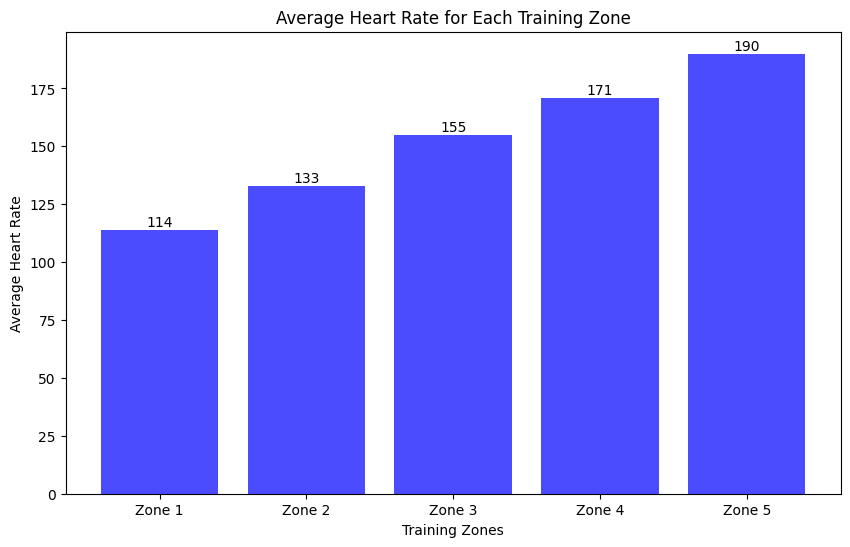

In [0]:
data = [
    (1, '{"average": 114}'),
    (2, '{"average": 133}'),
    (3, '{"average": 155}'),
    (4, '{"average": 171}'),
    (5, '{"average": 190}'),
]
schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("heart_rate", StringType(), True)
])
polar_exercises_df = spark.createDataFrame(data, schema=schema)

# Parse the JSON and extract the average heart rate
schema = StructType([
    StructField("average", IntegerType(), True)
])
polar_exercises_df = polar_exercises_df.withColumn("heart_rate_json", from_json(col("heart_rate"), schema))

# Extract the average heart rate from the JSON structure
polar_exercises_df = polar_exercises_df.withColumn("average_heart_rate", col("heart_rate_json.average"))

# Define the training zones based on the average heart rate
zone1 = (polar_exercises_df["average_heart_rate"] < 120)
zone2 = (polar_exercises_df["average_heart_rate"] >= 120) & (polar_exercises_df["average_heart_rate"] < 140)
zone3 = (polar_exercises_df["average_heart_rate"] >= 140) & (polar_exercises_df["average_heart_rate"] < 160)
zone4 = (polar_exercises_df["average_heart_rate"] >= 160) & (polar_exercises_df["average_heart_rate"] < 180)
zone5 = (polar_exercises_df["average_heart_rate"] >= 180)

# Add new column to indicate the training zones for each row
polar_exercises_df = polar_exercises_df.withColumn("training_zone", 
        when(zone1, "Zone 1")
       .when(zone2, "Zone 2")
       .when(zone3, "Zone 3")
       .when(zone4, "Zone 4")
       .when(zone5, "Zone 5")
       .otherwise("Unknown"))

# Aggregate data by the training zone and calculate the average heart rate for each zone
zone_hr_avg = polar_exercises_df.groupBy("training_zone").agg(avg("average_heart_rate").alias("avg_heart_rate"))

# Convert Spark DataFrame to Pandas DataFrame
zone_hr_avg_pd = zone_hr_avg.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(zone_hr_avg_pd["training_zone"], zone_hr_avg_pd["avg_heart_rate"].round().astype(int), color='blue', alpha=0.7)
plt.title('Average Heart Rate for Each Training Zone')
plt.xlabel('Training Zones')
plt.ylabel('Average Heart Rate')

# Add labels inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.show()

# Verify Kaggle Datasets
The dataset formats from Kaggle can vary - often either a single csv or multiple csvs

The upload script for loading files into ADLS automatically merges each dataset into a single csv

Make sure dataset columns/values line up properly

## Crossfit
source: https://www.kaggle.com/datasets/ulrikthygepedersen/crossfit-athletes

In [0]:
display(crossfit_athletes_df.limit(20))

athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,null,null,null,null,null,null,null,220.0,null,400.0,305.0,null,null,I workout mostly at a CrossFit Affiliate|I have a coach who determines my programming|I record my workouts|,I played youth or high school level sports|I regularly play recreational sports|,I began CrossFit with a coach (e.g. at an affiliate)|I have attended one or more specialty courses|I have had a life changing experience due to CrossFit|,I do multiple workouts in a day 2x a week|,4+ years|
3517.0,Derek Abdella,null,null,null,Male,42.0,70.0,190.0,null,null,null,null,0.0,null,null,null,null,null,null,null,null,I have a coach who determines my programming|I record my workouts|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affiliate)|I have attended one or more specialty courses|I have had a life changing experience due to CrossFit|,I do multiple workouts in a day 2x a week|,4+ years|
4691.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,null,211.0,645.0,300.0,null,196.0,null,null,245.0,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I have a coach who determines my programming|I record my workouts|,I played youth or high school level sports|,I began CrossFit by trying it alone (without a coach)|I began CrossFit with a coach (e.g. at an affiliate)|I have completed the CrossFit Level 1 certificate course|I have attended one or more specialty courses|I have had a life changing experience due to CrossFit|I train other people|,I usually only do 1 workout a day|,4+ years|
5286.0,Bryce Abbey,null,null,null,Male,32.0,65.0,149.0,206.0,465.0,null,1053.0,null,null,1081.0,205.0,150.0,null,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I incorporate CrossFit.com workouts|I write my own programming|I record my workouts|,I played college sports|,I began CrossFit by trying it alone (without a coach)|I have completed the CrossFit Level 1 certificate course|I train other people|,I usually only do 1 workout a day|I strictly schedule my rest days|,1-2 years|
6491.0,Jason Abney,null,null,null,Male,37.0,73.0,230.0,null,null,null,null,null,null,null,265.0,200.0,435.0,414.0,null,I eat strict Paleo|,I workout mostly at a CrossFit Affiliate|I record my workouts|,I played youth or high school level sports|,I began CrossFit by trying it alone (without a coach)|I have completed the CrossFit Level 1 certificate course|I have had a life changing experience due to CrossFit|I train other people|,I usually only do 1 workout a day|I typically rest 4 or more days per month|,4+ years|
6610.0,Anthony Abeel,South Central,Get Lifted,Get Lifted CrossFit,Male,21.0,72.0,175.0,null,null,null,null,0.0,null,null,0.0,0.0,0.0,0.0,0.0,I eat quality foods but don't measure the amount|I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I have a coach who determines my programming|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affiliate)|I have completed the CrossFit Level 1 certificate course|I have had a life changing experience due to CrossFit|I train other people|,I do multiple workouts in a day 3+ times a week|I typically rest fewer than 4 days per month|,2-4 years|
7268.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
7463.0,Tye Abell,null,null,null,Male,30.0,72.0,175.0,null,null,null,null,0.0,null,null,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null
8242.0,Ryan Achilles,nul

## NFL Combine Results (2000 - 2022)
source: https://www.kaggle.com/datasets/mitchellweg1/nfl-combine-results-dataset-2000-2022

In [0]:
display(nfl_combine_results_df.limit(20))

Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,csvfilename_year
John Abraham,OLB,South Carolina,6-4,252.0,4.55,null,null,null,null,null,2000
Shaun Alexander,RB,Alabama,6-0,218.0,4.58,null,null,null,null,null,2000
Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000
Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,null,104.0,7.29,4.49,2000
Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,null,123.0,7.18,4.15,2000
Jake Arians,K,Ala-Birmingham,5-10,202.0,null,null,null,null,null,null,2000
LaVar Arrington,OLB,Penn State,6-3,250.0,4.53,null,null,null,null,null,2000
Corey Atkins,OLB,South Carolina,6-0,237.0,4.72,31.0,21.0,112.0,7.96,4.39,2000
Kyle Atteberry,K,Baylor,6-0,167.0,null,null,null,null,null,null,2000
Reggie Austin,CB,Wake Forest,5-9,175.0,4.44,35.0,17.0,119.0,7.03,4.14,2000


# Verify Manually Scraped Dataset

## World Athletics
source: https://mastersrankings.com/rankings/

Verify values are showing correctly, especially for performance, athlete name, and age.

In [0]:
display(world_athletics_df.limit(20))

Rank,Performance,Wind,Athlete,Age,Country,Location,Date
1,9.85,(+1.0),Yohan Blake,32,JAM,"Kingston, JAM",23 Jun 22 - 26 Jun 22
2,9.93,(+2.9),Mouhamadou Fall,30,FRA,"Montverde, FL, USA",4 Jun 22
3,9.98,(+1.1),Emmanuel Matadi,31,LBR,"Port-of-Spain, TTO",24 Jun 22 - 26 Jun 22
4,10.00,(+5.6),Harry Aikines-Aryeetey,33,GBR,"Manchester, GBR",24 Jun 22 - 26 Jun 22
5,10.03,(+1.2),Oshane Bailey,32,JAM,"Kingston, JAM",23 Jun 22 - 26 Jun 22
6,10.04,(+0.6),Kemar Bailey-Cole,30,JAM,"Kingston, JAM",23 Jun 22 - 26 Jun 22
7,10.05,(+2.1),Emile Erasmus,30,RSA,"København, DEN",16 Jun 22
8,10.06,(-0.3 ),Aaron Brown,30,CAN,"Zürich, SUI",7 Sep 22 - 8 Sep 22
9,10.07,(+2.3),Jimmy Vicaut,30,FRA,"Savona, ITA",18 May 22
10,10.09,(+1.2),Kukyoung Kim,31,KOR,"Tottori, JPN",25 Jun 22 - 26 Jun 22
